In [2]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

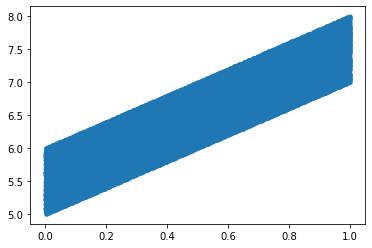

In [8]:
M = 100_000
X = np.random.rand(M,1)
y = 5 + 2*X + np.random.rand(M,1)
plt.plot(X,y, '.')

X_b = np.c_[np.ones((M,1)), X] # add x0 = 1 for all examples

In [14]:
## Least squares implementation
theta_ls = la.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_ls)

## Gradient descent
eta = 0.1
theta_gd = np.random.rand(2,1)
for i in range(1000):
    dMSE = 2/M * X_b.T.dot(X_b.dot(theta_gd) - y)
    theta_gd -= eta * dMSE
print(theta_gd)

[[5.50195195]
 [1.99641391]]


[[5.50195103]
 [1.99641563]]


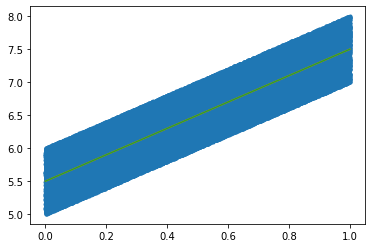

In [16]:
X_reg = np.array([[0],[1]])
X_reg_b = np.c_[np.ones((2,1)), X_reg]

y_ls = X_reg_b.dot(theta_ls)
y_gd = X_reg_b.dot(theta_gd)

plt.plot(X,y, '.')
plt.plot(X_reg, y_gd)
plt.plot(X_reg, y_ls)